# PROYECTO1-ETAPA1

**INTEGRANTES**
- Juan Sebastian Sanchez Delgado - 202013577
- Miguel Angel Cardenas - 202010998
- Santiago Paeres Gonzalez - 201425176

## 1. Entendimiento y preparacion de los datos


In [2]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Descargando stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_ods = pd.read_csv("./cat_345.csv", sep=';', encoding = 'utf8')

In [6]:
df_ods.shape

(3000, 2)

In [7]:
df_ods.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [8]:
df_ods.sample(5)

,Textos_espanol,sdg
1638,Sobre la base de la importante base de conocim...,4
1361,"Sin embargo, cuando los docentes se enfrentan ...",4
1026,"Desde 2006, el gobierno ha revisado progresiva...",4
2923,"Los servicios estÃ¡ndar incluyen, entre otros:...",5
1634,Los centros de AEPI de calidad responden a la ...,4


### 1.1 Completitud

In [9]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_ods.isnull().sum() / df_ods.shape[0]

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [10]:
# Cálculo de porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

### 1.2 Unicidad

In [11]:
# Se revisa el numero de filas duplicadas
df_ods.duplicated(keep = False).sum()

0

### 1.3 Consistencia

In [12]:
df_ods["Textos_espanol"] = df_ods["Textos_espanol"].astype(str)

### 1.4 Validez

In [13]:
df_ods['sdg'].value_counts()

sdg
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [14]:
df_ods['Textos_espanol'].value_counts()

Textos_espanol
Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.                                         

In [15]:
df_ods.sample(20)

,Textos_espanol,sdg
561,"Al hacerlo, las etiquetas deben ser explícitas...",3
1595,"Además, el documento trata de plantear varios ...",4
105,La relación coste-beneficio reveló que por cad...,3
279,Mientras que la tasa de empleo de las personas...,3
1464,Estos atributos requeridos también se amplían ...,4
632,Identificación de posibles innovaciones en el ...,3
2223,Hace un llamado a los gobiernos para que “gara...,5
1590,Una enmienda a la Ley de Educación Escolar (20...,4
1314,Ofrecer más oportunidades de aprendizaje colab...,4
1861,"Además, la competencia de un estudiante, en sí...",4


In [16]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
10,Dos encuestados seÃ±alaron que no existe un or...,3
26,"También promueve mejoras en la prevención, el ...",3
30,La falta de programas completos de acreditació...,3
46,Dado el aumento de enfermedades crónicas como ...,3
...,...,...
2984,Las actividades empresariales siguen viéndose ...,5
2990,La Agenda Nacional de Jordania 2006-15 estable...,5
2991,"En la mayoría de los países de la CAO, los fun...",5
2996,"Por el contrario, el porcentaje de hogares en ...",5


In [17]:
# Remplaza lo caracteres erroneos con su equivalencia pero en UTF-8
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã©', 'é')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã', 'í')

In [18]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg


In [19]:
df_ods.sample(10)

,Textos_espanol,sdg
2709,"No obstante, también se incluyen variables esp...",5
2176,La Ley Agraria de México de 1971 otorgó a las ...,5
2231,"Sin embargo, este tipo de trabajo sin duda par...",5
1238,"En PISA 2012, el desempeño de los estudiantes ...",4
2280,El análisis se basa en la bibliografía existen...,5
1321,"En 2016, se asignó una financiación adicional ...",4
2222,"En consecuencia, la inversión gubernamental en...",5
1193,"Al hacerlo, también ayuda a las escuelas a ret...",4
2511,También es vital para la capacidad de las muje...,5
724,"Entre 1985 y 2014, los habitantes de zonas urb...",3


### 1.5 Transformacion

In [20]:
# Se dividen los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_ods["Textos_espanol"], df_ods["sdg"], test_size=0.3, stratify=df_ods["sdg"], random_state=1)

In [21]:
X_train.shape, X_test.shape

((2100,), (900,))

In [22]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

In [23]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [24]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15134


In [27]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [28]:
X_tfidf = tfidf.fit_transform(X_train)

In [29]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15134


## 2. Modelado y evaluacion

### 2.1 Entrenando Modelo con BoW y Random Forest classifier (Juan Sebastian Sanchez Delgado)

In [30]:
bow_model = RandomForestClassifier(random_state=2)

In [31]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

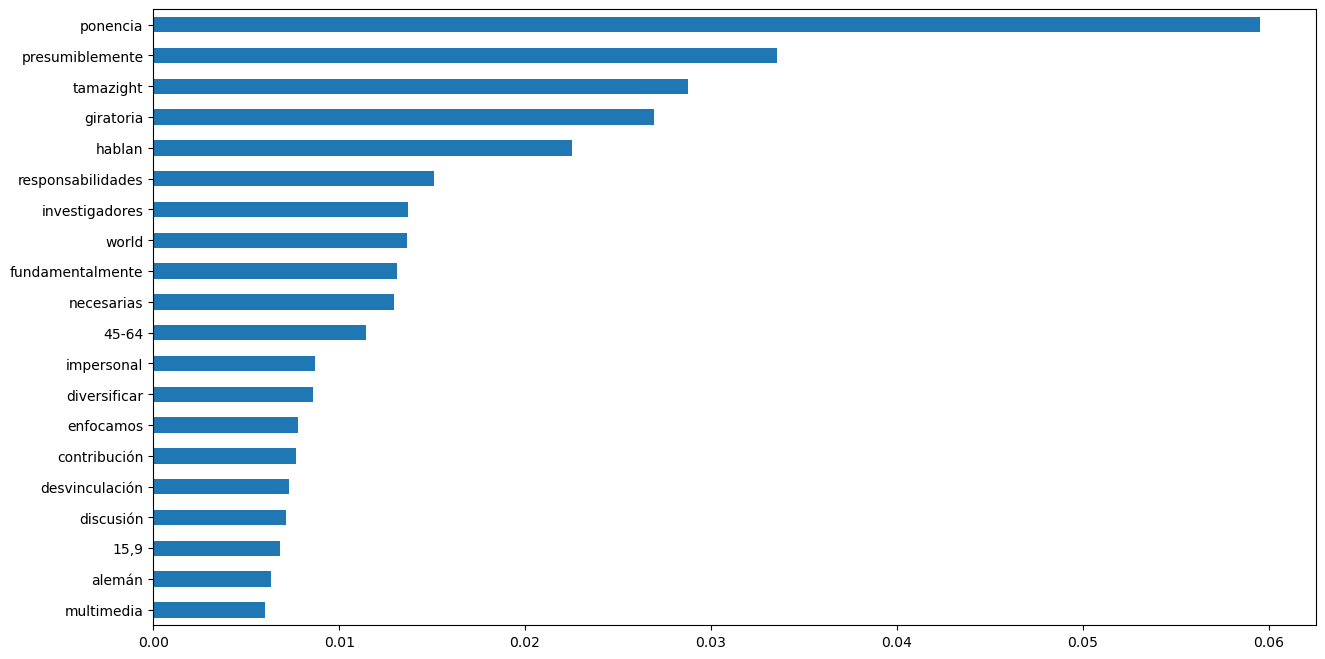

In [32]:
# Se muestra la importancia de algunas palabras para determinar que tan relevante es para tomar una decision para el modelo
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [33]:
bow_estimators = bow_model.estimators_
print("Numero de arboles de decision:", len(bow_estimators))
print("Profundidad de los arboles (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Numero de arboles de decision: 100
Profundidad de los arboles (mean): 97.14


In [34]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

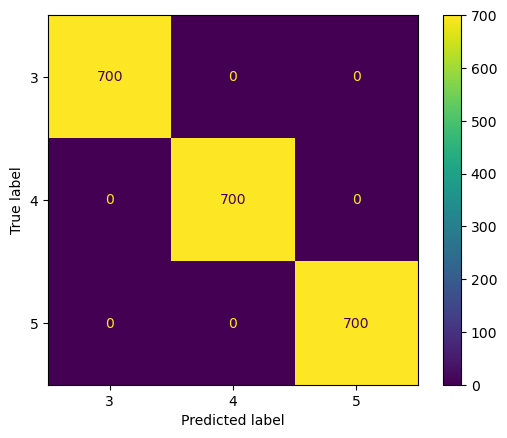

In [35]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

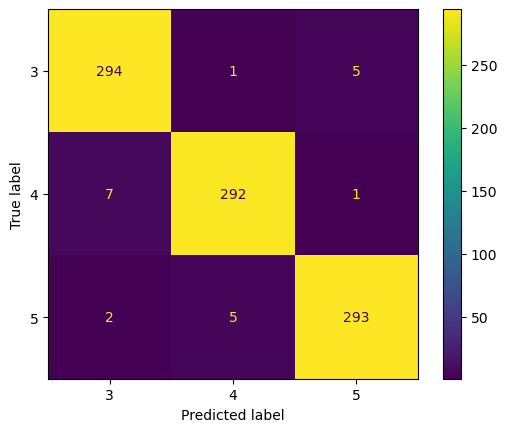

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [37]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [38]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9766666666666667
Recall: 0.9766666666666667
F1: 0.9766666666666667


### 2.2 Entrenando modelo con TF-IDF (Santiago Paeres Gonzalez)

In [39]:
tfidf_model = RandomForestClassifier(random_state=3)

In [40]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

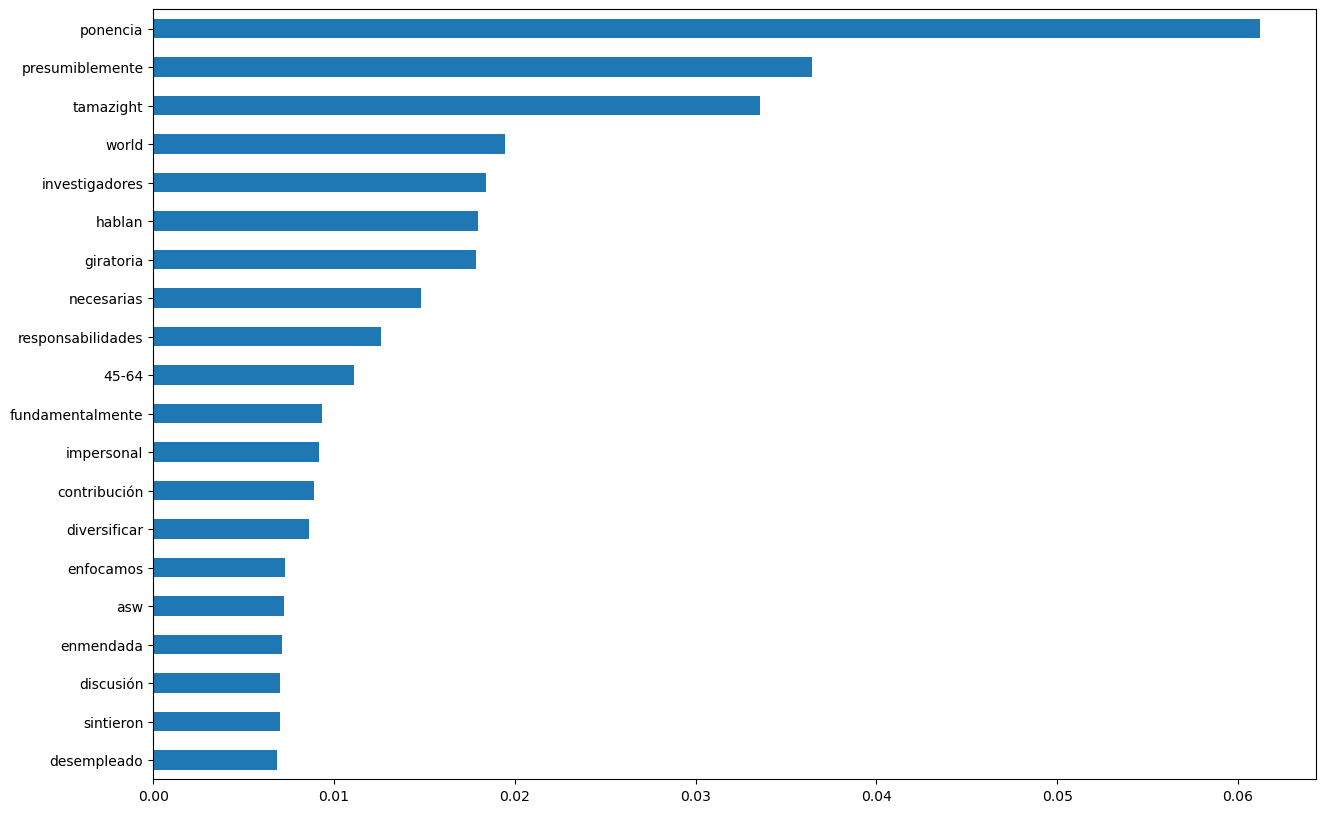

In [41]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [42]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.28


In [43]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

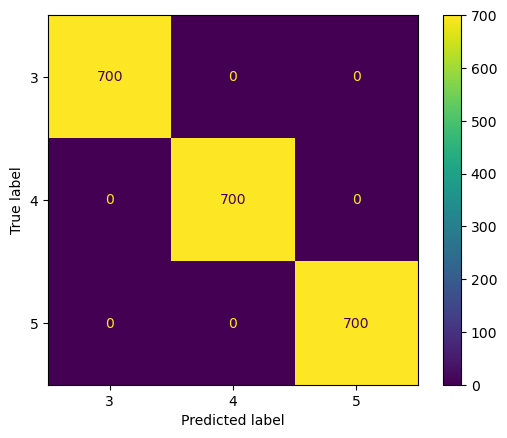

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

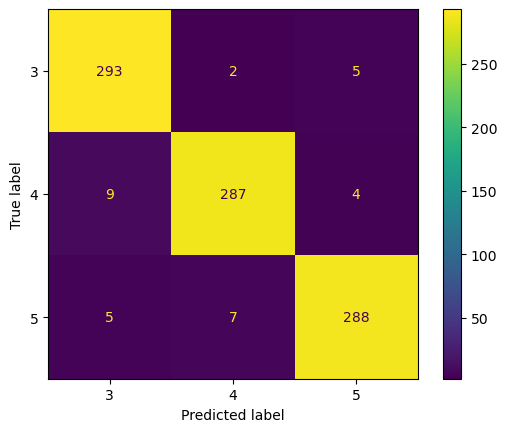

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [46]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [47]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.9644444444444444
Recall: 0.9644444444444444
F1: 0.9644444444444444


### Model selection

In [75]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [76]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [30, 50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}

In [77]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=15, scoring=["precision", "recall", "f1"], refit="f1", cv=30, return_train_score=True, verbose=1, random_state=5)

In [78]:
search.fit(X_train, y_train)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


RandomizedSearchCV(cv=30,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                

In [81]:
search.best_params_

{'vectorizer__lowercase': True,
 'vectorizer': TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fe9f35191f0>),
 'classifier__n_estimators': 50,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [74]:
search.best_score_

nan

In [82]:
y_train_search_predict = search.best_estimator_.predict(X_train)
y_test_search_predict = search.best_estimator_.predict(X_test)

In [83]:
print("Precision:", precision_score(y_train, y_train_search_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_search_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_search_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [84]:
print("Precision:", precision_score(y_test, y_test_search_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_search_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_search_predict, average='micro'))

Precision: 0.9644444444444444
Recall: 0.9644444444444444
F1: 0.9644444444444444


### 2.3 Algoritmo 3

## 3. Resultados